#### Import pandas and geopandas

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# Obtain coordinates.csv

coordinates_file_path = "../data/city/population/coordinates.csv"

df_home_list = pd.read_csv(coordinates_file_path)

df_home_list


,lon,lat,building_type
0,-1.564636,53.827001,apartments
1,-1.550490,53.811813,apartments
2,-1.542127,53.781703,apartments
3,-1.623508,53.800694,apartments
4,-1.615872,53.798921,apartments
...,...,...,...
222610,-1.482881,53.826679,terrace
222611,-1.482691,53.826882,terrace
222612,-1.482641,53.826925,terrace
222613,-1.482592,53.826967,terrace


#### Obtain geodataframe from shapefile of all wards

In [5]:
#wards_shapefile_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/Wards_(December_2017)_Boundaries_in_the_UK_(WGS84)/Wards_(December_2017)_Boundaries_in_the_UK_(WGS84).shp"

wards_shapefile_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/RE__Wards_boundary_spreadsheet_2020/Wards_May_2020_Boundaries_UK_BGC.shp"

wards_shapes_gdf_full = gpd.read_file(wards_shapefile_path)

wards_shapes_gdf = wards_shapes_gdf_full[["wd20cd","wd20nm","geometry"]].copy()


In [6]:
wards_shapes_gdf

,wd20cd,wd20nm,geometry
0,E05000026,Abbey,"MULTIPOLYGON (((0.08006 51.54477, 0.08597 51.5..."
1,E05000027,Alibon,"POLYGON ((0.15638 51.55102, 0.15649 51.54837, ..."
2,E05000028,Becontree,"POLYGON ((0.12716 51.55561, 0.12494 51.55294, ..."
3,E05000029,Chadwell Heath,"POLYGON ((0.14821 51.59897, 0.14765 51.59679, ..."
4,E05000030,Eastbrook,"POLYGON ((0.18515 51.56478, 0.18399 51.56385, ..."
...,...,...,...
8810,W05001034,Seven Sisters,"POLYGON ((-3.71490 51.77822, -3.71412 51.77773..."
8811,W05001035,Tai-bach,"POLYGON ((-3.73214 51.60008, -3.73222 51.59848..."
8812,W05001036,Broughton South,"POLYGON ((-2.97093 53.16078, -2.97520 53.15742..."
8813,W05001037,Penally,"POLYGON ((-4.72793 51.69934, -4.72527 51.69920..."


#### Obtain list of all Leeds wards names

In [25]:
#leeds_wards_list_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/leeds_wards_list.txt"
#with open(leeds_wards_list_path) as f:
#    leeds_wards_names_list = f.read().splitlines()
#leeds_wards_names_list

#leeds_wards_list_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/leeds_wards_list.csv"
leeds_wards_list_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/Leeds_Wards_Population.csv"
leeds_wards_names_df = pd.read_csv(leeds_wards_list_path)
leeds_wards_names_df

,ward_code,ward_name,population
0,E05011384,Ardsley & Robin Hood,22806
1,E05011385,Armley,24933
2,E05011387,Bramley & Stanningley,22727
3,E05011388,Burmantofts & Richmond Hill,28308
4,E05011389,Calverley & Farsley,23154
5,E05011390,Chapel Allerton,24280
6,E05011391,Cross Gates & Whinmoor,23120
7,E05011393,Garforth & Swillington,20086
8,E05011394,Gipton & Harehills,32983
9,E05011395,Guiseley & Rawdon,22843


#### Manually confirming that all Leeds wards names are in shapefile wards list

In [30]:
wards_names = wards_shapes_gdf["wd20nm"].values
in_list = []
out_list = []
for wname in list(leeds_wards_names_df["ward_name"]):
    if wname in wards_names:
        in_list.append(wname)
    else:
        out_list.append(wname)

print(len(leeds_wards_names_list))
print(len(wards_names))
print(len(in_list))
print(len(out_list))
print(in_list)
print(out_list)

wards_codes = wards_shapes_gdf["wd20cd"].values
in_list = []
out_list = []
for wcode in list(leeds_wards_names_df["ward_code"]):
    if wcode in wards_codes:
        in_list.append(wcode)
    else:
        out_list.append(wcode)

print(len(leeds_wards_names_list))
print(len(wards_codes))
print(len(in_list))
print(len(out_list))
print(in_list)
print(out_list)

33
8815
33
0
['Ardsley & Robin Hood', 'Armley', 'Bramley & Stanningley', 'Burmantofts & Richmond Hill', 'Calverley & Farsley', 'Chapel Allerton', 'Cross Gates & Whinmoor', 'Garforth & Swillington', 'Gipton & Harehills', 'Guiseley & Rawdon', 'Harewood', 'Headingley & Hyde Park', 'Hunslet & Riverside', 'Killingbeck & Seacroft', 'Kippax & Methley', 'Kirkstall', 'Little London & Woodhouse', 'Middleton Park', 'Moortown', 'Morley North', 'Morley South', 'Pudsey', 'Rothwell', 'Roundhay', 'Temple Newsam', 'Weetwood', 'Wetherby', 'Horsforth', 'Otley & Yeadon', 'Beeston & Holbeck', 'Farnley & Wortley', 'Adel & Wharfedale', 'Alwoodley']
[]
33
8815
33
0
['E05011384', 'E05011385', 'E05011387', 'E05011388', 'E05011389', 'E05011390', 'E05011391', 'E05011393', 'E05011394', 'E05011395', 'E05011396', 'E05011397', 'E05011399', 'E05011400', 'E05011401', 'E05011402', 'E05011403', 'E05011404', 'E05011405', 'E05011406', 'E05011407', 'E05011409', 'E05011410', 'E05011411', 'E05011412', 'E05011413', 'E05011414'

#### Pare down wards shapes dataframe into only the relevant wards (ones in Leeds)

In [31]:
leeds_wards_shapes_gdf = wards_shapes_gdf.loc[wards_shapes_gdf['wd20cd'].isin(list(leeds_wards_names_df["ward_code"]))]

In [34]:
leeds_wards_shapes_gdf.shape

(33, 3)

#### Create geodataframe, same as df_home_list but with a geometry column containing Point objects made from lon/lat

In [35]:
gdf_home_list = gpd.GeoDataFrame(df_home_list, geometry=gpd.points_from_xy(df_home_list['lon'], df_home_list['lat']))


In [34]:
gdf_home_list

,lon,lat,building_type,geometry
0,-1.564636,53.827001,apartments,POINT (-1.56464 53.82700)
1,-1.550490,53.811813,apartments,POINT (-1.55049 53.81181)
2,-1.542127,53.781703,apartments,POINT (-1.54213 53.78170)
3,-1.623508,53.800694,apartments,POINT (-1.62351 53.80069)
4,-1.615872,53.798921,apartments,POINT (-1.61587 53.79892)
...,...,...,...,...
222610,-1.482881,53.826679,terrace,POINT (-1.48288 53.82668)
222611,-1.482691,53.826882,terrace,POINT (-1.48269 53.82688)
222612,-1.482641,53.826925,terrace,POINT (-1.48264 53.82692)
222613,-1.482592,53.826967,terrace,POINT (-1.48259 53.82697)


#### Manually confirming that the first coordinate in the list is within the Weetwood ward

In [37]:
weetwood_poly = leeds_wards_shapes_gdf.loc[leeds_wards_shapes_gdf['wd20nm'] == "Weetwood"].iloc[0].loc["geometry"]

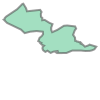

In [38]:
weetwood_poly

In [39]:
weetwood_poly.contains(gdf_home_list.iloc[0].loc["geometry"])

True

#### Creating df_home_ward_list, same as df_home_list but includes ward_name and ward_code, by checking each Leeds ward polygon to see if it contains the Point defined by the lon/lat of the home.

#### If no Leeds ward contains the Point, then the Point is recorded in a separate dataframe, missing_ward_df.

In [41]:
import time

df_home_ward_list = df_home_list.copy()
df_home_ward_list["ward_name"] = ""
df_home_ward_list["ward_code"] = ""

missing_ward_df = pd.DataFrame(columns=['lon','lat','building_type','ward_name','ward_code'])
print_every = 500

start_time = time.time()
prev_time = time.time()
now_time = time.time()
time_list = []
for home_index, home_row in gdf_home_list.iterrows():
    now_time = time.time()
    time_list.append(now_time-prev_time)
    if home_index % print_every == 0:
        print(f'{home_index}   {missing_ward_df.shape}   {now_time-start_time}')
    prev_time = now_time
    home_pt = home_row["geometry"]
    missing_ward = True
    for ward_index, ward_row in leeds_wards_shapes_gdf.iterrows():
        if ward_row["geometry"].contains(home_pt):
            df_home_ward_list.loc[home_index, "ward_name"] = ward_row["wd20nm"]
            df_home_ward_list.loc[home_index, "ward_code"] = ward_row["wd20cd"]
            missing_ward = False
            break
    if missing_ward:
        still_missing = True
        for other_index, other_row in wards_shapes_gdf.iterrows():
            if other_row["geometry"].contains(home_pt):
                missing_ward_df.loc[home_index] = home_row.append(pd.Series(data={'ward_name':other_row["wd20nm"], 
                                                                                  'ward_code':other_row["wd20cd"]}))
                still_missing = False
        if still_missing:
            missing_ward_df.loc[home_index] = home_row

0   (0, 5)   0.04592633247375488
500   (0, 5)   6.133726596832275
1000   (0, 5)   11.140056848526001
1500   (0, 5)   16.48957061767578
2000   (0, 5)   21.7829909324646
2500   (0, 5)   27.23591184616089
3000   (0, 5)   33.31986403465271
3500   (0, 5)   39.18595600128174
4000   (0, 5)   45.06282997131348
4500   (0, 5)   51.081899881362915
5000   (0, 5)   56.95588731765747
5500   (0, 5)   62.77190279960632
6000   (0, 5)   68.39741206169128
6500   (0, 5)   74.04156064987183
7000   (0, 5)   80.2110116481781
7500   (0, 5)   86.11608242988586
8000   (0, 5)   91.94176006317139
8500   (0, 5)   97.31273627281189
9000   (1, 5)   104.09644150733948
9500   (2, 5)   110.80639338493347
10000   (2, 5)   116.64131116867065
10500   (4, 5)   124.77036881446838
11000   (4, 5)   130.37356996536255
11500   (4, 5)   135.7982964515686
12000   (4, 5)   141.2193250656128
12500   (4, 5)   146.65891218185425
13000   (4, 5)   152.64751863479614
13500   (4, 5)   158.533842086792
14000   (4, 5)   164.54859852790833


116000   (5, 5)   1255.9607298374176
116500   (5, 5)   1261.3571043014526
117000   (5, 5)   1266.4079897403717
117500   (5, 5)   1270.8146057128906
118000   (5, 5)   1275.9408297538757
118500   (5, 5)   1280.9179615974426
119000   (5, 5)   1285.8960554599762
119500   (5, 5)   1290.8904585838318
120000   (5, 5)   1295.9784953594208
120500   (5, 5)   1301.2611675262451
121000   (5, 5)   1306.5528111457825
121500   (5, 5)   1311.7933766841888
122000   (5, 5)   1316.8110496997833
122500   (5, 5)   1321.3269982337952
123000   (5, 5)   1325.9701178073883
123500   (5, 5)   1331.855532169342
124000   (5, 5)   1337.395015001297
124500   (5, 5)   1342.6132502555847
125000   (5, 5)   1348.3480243682861
125500   (5, 5)   1353.3700697422028
126000   (5, 5)   1358.2780108451843
126500   (5, 5)   1363.122926235199
127000   (5, 5)   1368.0360524654388
127500   (5, 5)   1373.155038356781
128000   (5, 5)   1378.3780794143677
128500   (5, 5)   1383.7831737995148
129000   (5, 5)   1389.2110714912415
12950

In [42]:
df_home_ward_list

,lon,lat,building_type,geometry,ward_name,ward_code
0,-1.564636,53.827001,apartments,POINT (-1.56464 53.82700),Weetwood,E05011413
1,-1.550490,53.811813,apartments,POINT (-1.55049 53.81181),Headingley & Hyde Park,E05011397
2,-1.542127,53.781703,apartments,POINT (-1.54213 53.78170),Hunslet & Riverside,E05011399
3,-1.623508,53.800694,apartments,POINT (-1.62351 53.80069),Farnley & Wortley,E05012648
4,-1.615872,53.798921,apartments,POINT (-1.61587 53.79892),Armley,E05011385
...,...,...,...,...,...,...
222610,-1.482881,53.826679,terrace,POINT (-1.48288 53.82668),Killingbeck & Seacroft,E05011400
222611,-1.482691,53.826882,terrace,POINT (-1.48269 53.82688),Killingbeck & Seacroft,E05011400
222612,-1.482641,53.826925,terrace,POINT (-1.48264 53.82692),Killingbeck & Seacroft,E05011400
222613,-1.482592,53.826967,terrace,POINT (-1.48259 53.82697),Killingbeck & Seacroft,E05011400


In [44]:
missing_ward_df

,lon,lat,building_type,ward_name,ward_code
8835,-1.717432,53.913830,house,Washburn,E05011346
9464,-1.716395,53.916465,house,Washburn,E05011346
10412,-1.694582,53.917262,house,Washburn,E05011346
10448,-1.695385,53.917184,house,Washburn,E05011346
19697,-1.720773,53.864859,house,Baildon,E05001341
206220,-1.409313,53.929750,house,Spofforth with Lower Wharfedale,E05011345


#### Save dataframe with homes and ward info to csv file

In [43]:
leeds_homes_wards_csv_path = "C:/Users/adminuser/Desktop/CDRC/Data/CODIT/leeds_homes_wards_update0309.csv"

leeds_homes_wards_df_nogeo = df_home_ward_list.drop("geometry",axis=1)

leeds_homes_wards_df_nogeo.to_csv(leeds_homes_wards_csv_path, index=False)


